In [ ]:

%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/123.0.6312.122/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.4 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller
from selenium import webdriver
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

SELENIUM


In [ ]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/126.0.6423.2/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver
pip install selenium chromedriver_autoinstaller

In [ ]:
!apt --fix-broken install

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chromedriver_autoinstaller.install()

driver = webdriver.Chrome(options=chrome_options)

In [ ]:
def getNews(company , label):
    url = f"https://www.marketbeat.com/stocks/NASDAQ/{company}/news/"
    driver.get(url)
    driver.get_screenshot_as_file("python_org_screenshot.png")
    time.sleep(2)
    dropdown = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "dropdownMediaSentiment"))
    )
    dropdown.click()


    dropdownList = driver.find_element(By.XPATH, '//ul[@aria-labelledby="dropdownMediaSentiment"]')
    sentimentButton = dropdownList.find_elements(By.TAG_NAME, "label");
    for button in sentimentButton:

        if(label == "Positive"):
            if(button.text == "Positive" or button.text == "Very Positive"):
                button.click()
        elif(label == "Negative"):
            if(button.text == "Negative" or button.text == "Very Negative"):
                button.click()

    time.sleep(2)
    driver.get_screenshot_as_file("screenshot.png")
    html = driver.page_source

    return html


In [ ]:


from bs4 import BeautifulSoup

def cleanBs4(company , label):
    html = getNews(company,label)
    soup = BeautifulSoup(html, "html.parser")
    rows = soup.select("tbody tr")

    news = []
    for row in rows:
        headline_cell = row.select_one("td:nth-child(2)")
        headline_link = headline_cell.select_one("a.stretched-link")
        headline_text = headline_link.text.strip()
        date_text = headline_cell.text.split("-")[-1].strip()
        print(f"Headline: {headline_text}")
        print(f"Date: {date_text}")
        print()
        if(label == "Positive"):
            news.append([ "positive",headline_text ])
        else:
            news.append(["negative",headline_text ])

    return news

cleanBs4("NVDA", "Positive")


[]

In [ ]:
print(getNews("NVDA", "Positive"))

In [ ]:
print(cleanBs4("NVDA" , "Positive"))

[]


In [ ]:
random_data_with_sentiment = cleanBs4("NVDA" , "Positive")
random_data_with_sentiment += cleanBs4("NVDA" , "Negative")
random_data_with_sentiment += cleanBs4("AAPL" , "Positive")
random_data_with_sentiment += cleanBs4("AAPL" , "Negative")
random_data_with_sentiment += cleanBs4("META" , "Positive")
random_data_with_sentiment += cleanBs4("META" , "Negative")
random_data_with_sentiment += cleanBs4("GOOG" , "Positive")
random_data_with_sentiment += cleanBs4("GOOG" , "Negative")
print(random_data_with_sentiment)

[]


In [ ]:
def getSingularNews(company):
    url = f"https://www.marketbeat.com/stocks/NASDAQ/{company}/news/"
    driver.get(url)
    time.sleep(2)
    driver.get_screenshot_as_file("screenshot.png")
    html = driver.page_source

    return html


In [ ]:
import requests
from datetime import datetime, timedelta

# Define the stock symbol and time range
stock_symbol = "AAPL"
start_date = datetime.now() - timedelta(days=365)  # One year ago
end_date = datetime.now()

# Construct the API URL
base_url = "https://query1.finance.yahoo.com/v7/finance/spark"
params = {
    "symbols": stock_symbol,
    "range": f"{int(start_date.timestamp())}{int(end_date.timestamp())}",
    "interval": "1d",
    "events": "history"
}

# Send the API request
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract the news headlines
    if data and data["spark"]["result"]:
        headlines = [event["content"]["html"] for event in data["spark"]["result"][0]["events"]["events"]]
        for headline in headlines:
            print(headline)
else:
    print(f"Error: {response.status_code}")

Error: 429


In [ ]:


from bs4 import BeautifulSoup
from datetime import datetime

def cleanBs4(company):

    html =  getSingularNews(company)
    soup = BeautifulSoup(html, "html.parser")
    rows = soup.select("tbody tr")

    news = []
    for row in rows:
        headline_cell = row.select_one("td:nth-child(2)")
        headline_link = headline_cell.select_one("a.stretched-link")
        headline_text = headline_link.text.strip()
        date_text = headline_cell.text.split("-")[-1].strip()
        print(f"{headline_text}")
        date_obj = datetime.strptime(date_text, "%B %d at %I:%M %p").date()
        # print(date_obj)
        news.append(headline_text)

    return news

singular = cleanBs4("NVDA")


In [ ]:
import random
random.shuffle(singular)

singular = singular[:5]
print(singular)

['Morning Bid: Big Tech swoons as Q1s lurk, Nvidia decimated', "If you're investing in the AI theme for the long haul, here's how to pick the winners", 'Meitav Investment House Ltd. Increases Holdings in NVIDIA Co. (NASDAQ:NVDA)', 'Is Nvidia Getting Ready to Disrupt Another Computing Industry Standard?', 'Nvidia Stock Looks Too Cheap Here - Put Premiums are Very High and Worth Shorting']


In [ ]:
companylist = ["NVDA", "AMD", "MSFT", "AAPL", "GOOGL", "TSLA", "AMZN", "FB"]
merged = []
for company in companylist:
    try:
        positive_news = cleanBs4(company, "Positive")
        merged += (positive_news)
    except Exception as e:
        print(f"Error fetching news for {company}: {e}")

    try:
        negative_news = cleanBs4(company, "Negative")
        merged += (negative_news)
    except Exception as e:
        print(f"Error fetching news for {company}: {e}")
    print(len(merged))

print(merged)
print(len(merged))


In [ ]:
print(merged)

[['positive', 'Is Nvidia Getting Ready to Disrupt Another Computing Industry Standard?'], ['positive', 'Forget Bitcoin, Buy These AI Stocks Instead'], ['positive', 'Nvidia Stock Gains. What the Chip Maker Needs to Hear From Big Tech Earnings.'], ['positive', '2 Top Artificial Intelligence Stocks to Buy Right Now'], ['positive', 'Phocas Financial Corp. Has $676,000 Stake in NVIDIA Co. (NASDAQ:NVDA)'], ['positive', 'Could TSMC Become the Next Nvidia?'], ['positive', 'Zacks Research Equities Analysts Increase Earnings Estimates for NVIDIA Co. (NASDAQ:NVDA)'], ['positive', 'Nvidia Stock Looks Too Cheap Here - Put Premiums are Very High and Worth Shorting'], ['positive', "3 AI Stocks I'd Buy Over Nvidia Any Day of the Week"], ['positive', 'Why I Think Nvidia Will Continue Returning Value In The Long Run'], ['positive', 'Down but Far From Out: 3 Artificial Intelligence (AI) Stocks to Buy and Hold Forever'], ['positive', 'Stock-Split Watch: Is Nvidia Next?'], ['positive', '3 Must-Watch AI Sto

In [ ]:
from collections import Counter
labels = [item[0] for item in data]
label_counts = Counter(labels)

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Label Counts:
positive: 250
negative: 250


In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv


analyzer = SentimentIntensityAnalyzer()
data = random_data_with_sentiment
amount = len(data)
false_positive = 0
false_neutral = 0
false_negative = 0


for row in data:
  vs = analyzer.polarity_scores(row[1])
  # print("{:-<65} {}".format(row[1], str(vs)))
  if(vs["compound"]>= 0.05 ):
    if(row[0] != "positive"):
      false_positive += 1
  elif(vs["compound"] > -0.05 and vs["compound"] < 0.05 ):
    if(row[0] != "neutral"):
      false_neutral += 1
  elif(vs["compound"] <= -0.05 ):
    if(row[0] != "negative"):
      false_negative += 1
  else:
    print("error")

total_error = false_positive+false_neutral+false_negative
print(amount)
print(total_error)
print (f"False Positive : {false_positive } False Neutral : {false_neutral} False Negative: {false_negative}" )
print(100 - ((total_error/amount )* 100))




In [ ]:
pip install finvader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 764.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
values = ["positive", "neutral", "negative"]
text = "Nvidia Stock Looks Too Cheap Here - Put Premiums are Very High and Worth Shorting"
scores = finvader(text, use_sentibignomics=True, use_henry=True, indicator='compound')
conditions = [(scores > 0.05), (scores > -0.05) & (scores < 0.05), (scores < -0.05)]
print(scores)
pred_score = np.select(conditions, values)
print(pred_score)

0.4708
positive


In [ ]:
from finvader import finvader
import numpy as np

total_error = 0
amount = 0

falsePositive = 0
falseNegative = 0
falseNeutral = 0

for data in random_data_with_sentiment:
    values = ["positive","neutral" , "negative"]
    text = data[1]
    label = data[0]
    scores = finvader(text, use_sentibignomics=True, use_henry=True, indicator='compound')

    conditions = [(scores > 0.05), (scores > -0.05) & (scores < 0.05), (scores < -0.05)]
    # conditions = [(scores > 0), (scores < 0)]
    pred_score = np.select(conditions, values)

    # print(f'{pred_score} | {data[0]}')

    if data[0] != pred_score:
        total_error += 1
        if(pred_score == "positive"):
            falsePositive += 1
        elif(pred_score == "negative"):
            falseNegative += 1
        elif(pred_score == "neutral"):
            falseNeutral += 1

    amount += 1

print(100 - (total_error / amount) * 100)
print(falsePositive)
print(falseNegative)
print(falseNeutral)
print(total_error)

39.69072164948454
24
32
178


In [ ]:
print((falseNeutral/ total_error  )* 100)

76.06837606837607


In [ ]:
%pip install transformers
%pip install torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

def getSentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)
    labels = ['negative', 'neutral', 'positive']
    scores = []
    for i, label in enumerate(labels):
        prob = probabilities[0, i].item()
        scores.append(prob)
    sorted_scores = sorted(scores, reverse=True)
    output  = ""
    if sorted_scores[0] == scores[1]:
        second_highest_score_idx = scores.index(sorted_scores[1])
        print(f"The output is: {labels[second_highest_score_idx]}")
        output  = labels[second_highest_score_idx]
    else:
        highest_score_idx = scores.index(sorted_scores[0])
        print(f"The output is: {labels[highest_score_idx]}")
        output = labels[highest_score_idx]

    print(scores)
    return output

In [ ]:
amount = len(random_data_with_sentiment)
wrong = 0

for data in random_data_with_sentiment:
    if(data[0] == "neutral"):
        continue
    print(data[1])

    if(getSentiment(data[1]) != data[0].lower()):
        wrong += 1
        print(wrong)


print(100- ((wrong/amount )* 100))

In [ ]:
for data in singular:
    print(data)
    print(getSentiment(data))
    print("")

In [ ]:
from finvader import finvader
import numpy as np

total_error = 0
amount = 0

for data in singular:
    values = ["positive", "neutral","negative"]
    text = data
    scores = finvader(text, use_sentibignomics=False, use_henry=True, indicator='compound')
    print(scores)
    conditions = [(scores > 0.05), (scores > -0.05) & (scores < 0.05), (scores < -0.05)]
    # conditions = [(scores > 0), (scores < 0)]
    pred_score = np.select(conditions, values)

    print(f'{pred_score} | {data}')



-0.2023
negative | Morning Bid: Big Tech swoons as Q1s lurk, Nvidia decimated
0.4767
positive | If you're investing in the AI theme for the long haul, here's how to pick the winners
0.3612
positive | Meitav Investment House Ltd. Increases Holdings in NVIDIA Co. (NASDAQ:NVDA)
0.3612
positive | Is Nvidia Getting Ready to Disrupt Another Computing Industry Standard?
0.6068
positive | Nvidia Stock Looks Too Cheap Here - Put Premiums are Very High and Worth Shorting


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv


analyzer = SentimentIntensityAnalyzer()



for data in singular:
    vs = analyzer.polarity_scores(data)
    label = ""
    if(vs["compound"]>= 0.05 ):
        label = "Positive"
    elif(vs["compound"] > -0.05 and vs["compound"] < 0.05 ):
        label = "neutral"
    elif(vs["compound"] <= -0.05 ):
        label = "false"

    print(data)
    print(label)
    print(vs["compound"])



Morning Bid: Big Tech swoons as Q1s lurk, Nvidia decimated
false
-0.2023
If you're investing in the AI theme for the long haul, here's how to pick the winners
Positive
0.4767
Meitav Investment House Ltd. Increases Holdings in NVIDIA Co. (NASDAQ:NVDA)
neutral
0.0
Is Nvidia Getting Ready to Disrupt Another Computing Industry Standard?
Positive
0.3612
Nvidia Stock Looks Too Cheap Here - Put Premiums are Very High and Worth Shorting
Positive
0.2878


In [ ]:
nvdia_data = cleanBs4("NVDA")
apple_data = cleanBs4("AAPL")
meta_data = cleanBs4("META")
google_data = cleanBs4("GOOG")

In [ ]:
from finvader import finvader
import numpy as np

def checkForGraph(dataset):
    Pos = 0
    Neg = 0
    for data in dataset:
        values = ["positive", "neutral","negative"]
        text = data
        scores = finvader(text, use_sentibignomics=False, use_henry=True, indicator='compound')

        conditions = [(scores > 0.05), (scores > -0.05) & (scores < 0.05), (scores < -0.05)]
        # conditions = [(scores > 0), (scores < 0)]
        pred_score = np.select(conditions, values)
        if(pred_score == "positive"):
           Pos+= 1
        if(pred_score == "negative"):
            Neg+=1
    return Pos , Neg




In [ ]:
nvdiaPos,nvidiaNeg = checkForGraph(nvdia_data)
applePos,appleNeg = checkForGraph(apple_data)
metaPos,metaNeg = checkForGraph(meta_data)
googlePos, googleNeg = checkForGraph(google_data)


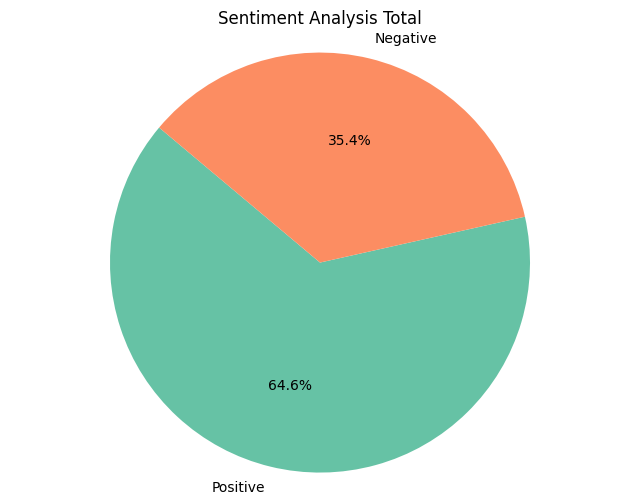

In [ ]:
import matplotlib.pyplot as plt

positive_count = nvdiaPos + applePos + metaPos + googlePos
negative_count = nvidiaNeg + appleNeg + metaNeg + googleNeg

# Data to plot
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['#66c2a5', '#fc8d62']  # Green for positive, Orange for negative

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Total')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


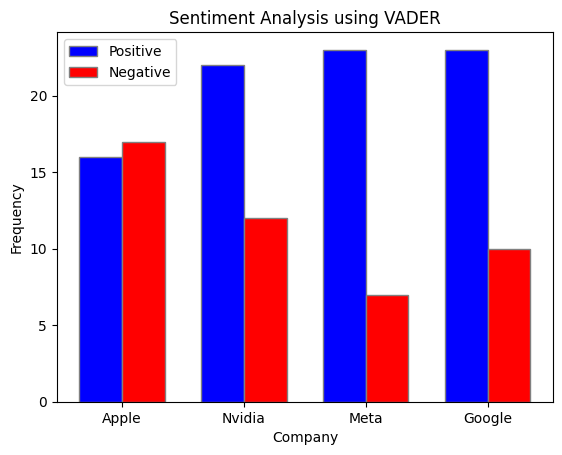

In [ ]:
import matplotlib.pyplot as plt

# Define the data
companies = ['Apple', 'Nvidia', 'Meta', 'Google']
positive_sentiments = [applePos, nvdiaPos, metaPos, googlePos]
negative_sentiments = [appleNeg, nvidiaNeg, metaNeg, googleNeg]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(companies))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, positive_sentiments, color='b', width=bar_width, edgecolor='grey', label='Positive')
plt.bar(r2, negative_sentiments, color='r', width=bar_width, edgecolor='grey', label='Negative')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis using VADER')
plt.xticks([r + bar_width/2 for r in range(len(companies))], companies)
plt.legend()

# Show the plot
plt.show()


In [ ]:
def checkForGraph(dataset):
    pos = 0
    neg = 0
    for data in dataset:
        # print(dataset)
        result = getSentiment(data)

        if(result == "positive"):
            pos += 1
        if(result == "negative"):
            neg += 1
    return pos,neg


In [ ]:
nvdiaPos,nvidiaNeg = checkForGraph(nvdia_data)
applePos,appleNeg = checkForGraph(apple_data)
metaPos,metaNeg = checkForGraph(meta_data)
googlePos, googleNeg = checkForGraph(google_data)

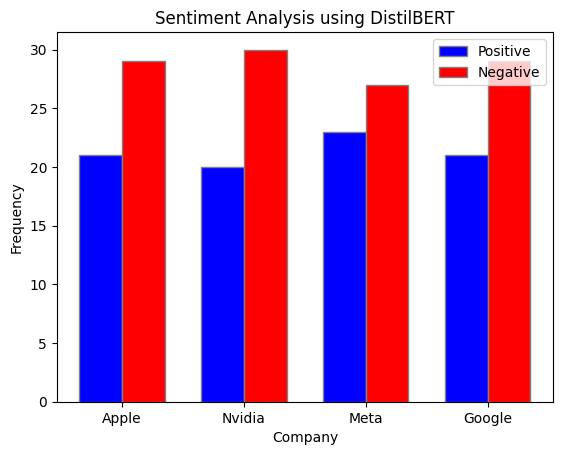

In [ ]:
import matplotlib.pyplot as plt

# Define the data
companies = ['Apple', 'Nvidia', 'Meta', 'Google']
positive_sentiments = [applePos, nvdiaPos, metaPos, googlePos]
negative_sentiments = [appleNeg, nvidiaNeg, metaNeg, googleNeg]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(companies))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, positive_sentiments, color='b', width=bar_width, edgecolor='grey', label='Positive')
plt.bar(r2, negative_sentiments, color='r', width=bar_width, edgecolor='grey', label='Negative')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis using DistilBERT')
plt.xticks([r + bar_width/2 for r in range(len(companies))], companies)
plt.legend()

# Show the plot
plt.show()


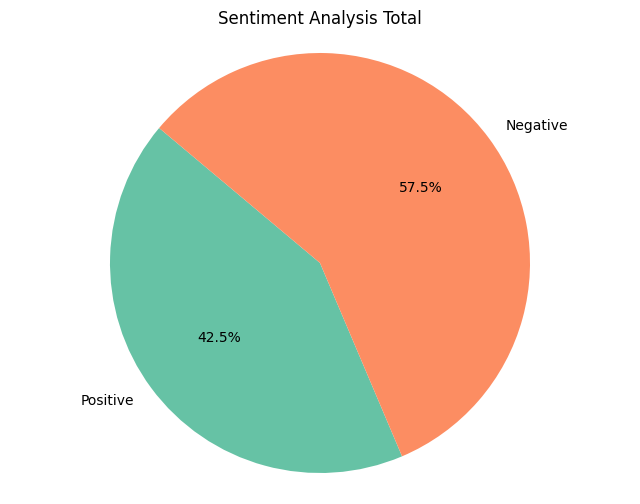

In [ ]:
import matplotlib.pyplot as plt

positive_count = nvdiaPos + applePos + metaPos + googlePos
negative_count = nvidiaNeg + appleNeg + metaNeg + googleNeg

# Data to plot
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['#66c2a5', '#fc8d62']  # Green for positive, Orange for negative

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Total')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
!pip install dateparser
!pip install python-dateutil


In [ ]:
import requests
import random
import dateparser
from finvader import finvader

listHeaders = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)",
    "referer": [
        "https://www.google.com/", "https://www.bing.com/",
        "https://www.instagram.com/", "https://www.facebook.com/"
    ],
    "accept": "application/json, text/plain, */*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.8",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site",
    "sec-fetch-user": "?1",
    "sec-gpc": "1"
}
url = "https://api.nasdaq.com/api/news/topic/articlebysymbol"


def getListLatestNews(sym: str, amount: int = 250):
  payload = {
      "q": f"{sym}|stocks",
      "offset": 0,
      "limit": amount,
      "fallback": False
  }

  currHeaders = {
      k: (random.choice(v) if isinstance(v, list or tuple) else v)
      for k, v in listHeaders.items()
  }
  try:
    session = requests.Session()
    session.headers = currHeaders
    resp = session.get(url, params=payload)
    return resp.json()['data']['rows']
  except Exception:
    return None

In [ ]:
dataset = getListLatestNews("NVDA" , 1000)


In [ ]:
print(dataset)

[{'title': 'Stocks Mixed with Earnings on Tap', 'image': '/barchart/shutterstock_1321462397.jpg', 'created': '', 'ago': '1 hour ago', 'primarysymbol': '', 'primarytopic': 'Stocks|4301', 'publisher': 'Barchart', 'related_symbols': ['spy|etf', 'dia|etf', 'qqq|etf', 'nvda|stocks', 'vsto|stocks', 'rhi|stocks', 'cah|stocks', 'vz|stocks', 'tsla|stocks', 'infa|stocks', 'nem|stocks'], 'url': '/articles/stocks-mixed-with-earnings-on-tap', 'id': 21178136, 'imagedomain': 'https://www.nasdaq.com/sites/acquia.prod/files'}, {'title': "What's in Store for Magnificent 7 Stocks in Q1 Earnings?", 'image': '', 'created': '', 'ago': '1 hour ago', 'primarysymbol': '', 'primarytopic': 'Stocks|4301', 'publisher': 'Zacks', 'related_symbols': ['amzn|stocks', 'aapl|stocks', 'msft|stocks', 'nvda|stocks', 'tsla|stocks', 'googl|stocks', 'meta|stocks'], 'url': '/articles/whats-in-store-for-magnificent-7-stocks-in-q1-earnings', 'id': 21178466, 'imagedomain': 'https://www.nasdaq.com/sites/acquia.prod/files'}, {'title

In [ ]:
print(dataset[0]["title"])
print(dataset[0]["ago"])

Stocks Mixed with Earnings on Tap
1 hour ago


In [ ]:
pip install python-dateutil


In [ ]:
from datetime import datetime
from dateutil import parser, relativedelta

def unify_date_format(date_str):
    try:
        # Try parsing the date string
        parsed_date = parser.parse(date_str)
        return parsed_date.strftime("%Y-%m-%d")  # Convert to a unified format
    except ValueError:
        # Attempt to handle relative time strings like "1 hour ago", "1 day ago"
        if "hour" in date_str.lower():
            delta = relativedelta.relativedelta(hours=1)
        elif "day" in date_str.lower():
            delta = relativedelta.relativedelta(days=1)
        else:
            return None  # Return None if the date string couldn't be parsed

        # Subtract the relative time from the current date
        current_date = datetime.now()
        new_date = current_date - delta
        return new_date.strftime("%Y-%m-%d")

In [ ]:
cleaned_dataset = []

for data in dataset:
    date = unify_date_format(data["ago"])
    if date is None:
        continue
    cleaned_dataset.append({'headline': data["title"], 'date': date})

print(cleaned_dataset)


[{'headline': 'Stocks Mixed with Earnings on Tap', 'date': '2024-04-22'}, {'headline': "What's in Store for Magnificent 7 Stocks in Q1 Earnings?", 'date': '2024-04-22'}, {'headline': 'What to Do With ServiceNow (NOW) Stock Ahead of Q1 Earnings?', 'date': '2024-04-22'}, {'headline': "Will Top-Line Growth Boost T-Mobile's (TMUS) Q1 Earnings?", 'date': '2024-04-22'}, {'headline': "Will Revenue Decline Hinder Juniper's (JNPR) Q1 Earnings?", 'date': '2024-04-22'}, {'headline': 'Nvidia Stock Was Not the Only Semiconductor Stock to Plummet on Friday -- Time to Buy?', 'date': '2024-04-22'}, {'headline': 'Stocks Push Higher Ahead of Megacap Tech Earnings', 'date': '2024-04-22'}, {'headline': 'Did ASML Just Drop Major Red Flags for Semiconductor Investors?', 'date': '2024-04-22'}, {'headline': "Nvidia Stock Crashed on Friday, but Here Is Why Investors Shouldn't Worry", 'date': '2024-04-22'}, {'headline': 'Nvidia Stock Investors Should Be Prepared for a Wild Week', 'date': '2024-04-22'}, {'headli

In [ ]:
def vaderSentiment(text):
    values = ["positive", "neutral","negative"]
    scores = finvader(text, use_sentibignomics=False, use_henry=True, indicator='compound')
    conditions = [(scores > 0.05), (scores > -0.05) & (scores < 0.05), (scores < -0.05)]
    # conditions = [(scores > 0), (scores < 0)]
    pred_score = np.select(conditions, values)
    return scores


In [ ]:
from collections import defaultdict
data = cleaned_dataset
grouped_data = defaultdict(list)

positive_threshold = 0.25
negative_threshold = -0.25

scores_group = []

for item in data:
    grouped_data[item['date']].append(item['headline'])

for date, headlines in grouped_data.items():
    values = ["positive", "neutral", "negative"]
    print(f"Date: {date}")
    total_sentiment = 0
    for headline in headlines:
        total_sentiment += vaderSentiment(headline)
    average_sentiment = total_sentiment / len(headlines)
    print("Average sentiment score:", average_sentiment)

    # Adjusted conditions based on threshold values
    conditions = [(average_sentiment > positive_threshold),
                  (average_sentiment > negative_threshold) and (average_sentiment < positive_threshold),
                  (average_sentiment < negative_threshold)]

    pred_score = np.select(conditions, values)
    print("Predicted score:", pred_score)
    scores_group.append({'scores': average_sentiment, 'date': date})

Date: 2024-04-22
Average sentiment score: 0.22855714285714288
Predicted score: neutral
Date: 2024-04-21
Average sentiment score: 0.19663178807947027
Predicted score: neutral
Date: 2024-04-15
Average sentiment score: 0.28211
Predicted score: positive
Date: 2024-04-14
Average sentiment score: 0.42003636363636365
Predicted score: positive
Date: 2024-04-13
Average sentiment score: 0.18872000000000003
Predicted score: neutral
Date: 2024-04-12
Average sentiment score: 0.22352727272727277
Predicted score: neutral
Date: 2024-04-11
Average sentiment score: 0.265645
Predicted score: positive
Date: 2024-04-10
Average sentiment score: 0.2600693877551021
Predicted score: positive
Date: 2024-04-09
Average sentiment score: 0.167334375
Predicted score: neutral
Date: 2024-04-08
Average sentiment score: 0.30195625000000004
Predicted score: positive
Date: 2024-04-07
Average sentiment score: 0.11783636363636366
Predicted score: neutral
Date: 2024-04-06
Average sentiment score: 0.48513125000000007
Predicte

In [ ]:
print(scores_group)

[{'scores': 0.22855714285714288, 'date': '2024-04-22'}, {'scores': 0.19663178807947027, 'date': '2024-04-21'}, {'scores': 0.28211, 'date': '2024-04-15'}, {'scores': 0.42003636363636365, 'date': '2024-04-14'}, {'scores': 0.18872000000000003, 'date': '2024-04-13'}, {'scores': 0.22352727272727277, 'date': '2024-04-12'}, {'scores': 0.265645, 'date': '2024-04-11'}, {'scores': 0.2600693877551021, 'date': '2024-04-10'}, {'scores': 0.167334375, 'date': '2024-04-09'}, {'scores': 0.30195625000000004, 'date': '2024-04-08'}, {'scores': 0.11783636363636366, 'date': '2024-04-07'}, {'scores': 0.48513125000000007, 'date': '2024-04-06'}, {'scores': 0.3164607142857143, 'date': '2024-04-05'}, {'scores': 0.21650000000000005, 'date': '2024-04-04'}, {'scores': 0.33745142857142857, 'date': '2024-04-03'}, {'scores': 0.1707612903225807, 'date': '2024-04-02'}, {'scores': 0.22029166666666672, 'date': '2024-04-01'}, {'scores': 0.3425750000000001, 'date': '2024-03-31'}, {'scores': 0.3565769230769231, 'date': '2024

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("NVDA", start="2024-03-20", end="2024-04-15")

print(data)

close_prices_array = data['Close'].values
open_prices_array = data['Open'].values
high_prices_array = data['High'].values
low_prices_array = data['Low'].values

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-20  897.969971  904.099976  882.229980  903.719971  903.719971   
2024-03-21  923.000000  926.479980  904.049988  914.349976  914.349976   
2024-03-22  911.409973  947.780029  908.340027  942.890015  942.890015   
2024-03-25  939.409973  967.659973  935.099976  950.020020  950.020020   
2024-03-26  958.510010  963.750000  925.020020  925.609985  925.609985   
2024-03-27  931.119995  932.400024  891.229980  902.500000  902.500000   
2024-03-28  900.000000  913.000000  891.929993  903.559998  903.559998   
2024-04-01  902.989990  922.250000  892.039978  903.630005  903.630005   
2024-04-02  884.479980  900.940002  876.200012  894.520020  894.520020   
2024-04-03  884.840027  903.739990  884.000000  889.640015  889.640015   
2024-04-04  904.059998  906.340027  858.799988  859.049988  859.049988   
2024-04-05  868.659973  884.809998  85

In [ ]:
dates_array = data.index.values
formatted_dates = [str(date)[:10] for date in dates_array]

print(formatted_dates)
print(scores_group)
formatted_dates_set = set(formatted_dates)
scores_and_dates_filtered = [entry for entry in scores_group if entry['date'] in formatted_dates_set]

print(scores_and_dates_filtered)
print(len(scores_and_dates_filtered))


['2024-03-20', '2024-03-21', '2024-03-22', '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12']
[{'scores': 0.22855714285714288, 'date': '2024-04-22'}, {'scores': 0.19663178807947027, 'date': '2024-04-21'}, {'scores': 0.28211, 'date': '2024-04-15'}, {'scores': 0.42003636363636365, 'date': '2024-04-14'}, {'scores': 0.18872000000000003, 'date': '2024-04-13'}, {'scores': 0.22352727272727277, 'date': '2024-04-12'}, {'scores': 0.265645, 'date': '2024-04-11'}, {'scores': 0.2600693877551021, 'date': '2024-04-10'}, {'scores': 0.167334375, 'date': '2024-04-09'}, {'scores': 0.30195625000000004, 'date': '2024-04-08'}, {'scores': 0.11783636363636366, 'date': '2024-04-07'}, {'scores': 0.48513125000000007, 'date': '2024-04-06'}, {'scores': 0.3164607142857143, 'date': '2024-04-05'}, {'scores': 0.21650000000000005, 'date': '2024-04-04'}, {'scores': 0.3374514285

In [ ]:
listOfScores =[entry['scores'] for entry in scores_and_dates_filtered]
print(listOfScores)
print(len(listOfScores))

[0.22352727272727277, 0.265645, 0.2600693877551021, 0.167334375, 0.30195625000000004, 0.3164607142857143, 0.21650000000000005, 0.33745142857142857, 0.1707612903225807, 0.22029166666666672, 0.28022941176470584, 0.2476957446808511, 0.3356837837837837, 0.25167547169811316, 0.30449999999999994, 0.32827894736842117, 0.06737]
17


In [ ]:
close_prices_array = data['Close']
open_prices_array = data['Open']
high_prices_array = data['High']
low_prices_array = data["Low"]
adj_prices_array = data["Adj Close"]
print(len(close_prices_array))

17


In [ ]:
import pandas as pd
data = {'Compound': listOfScores,
        'Close': close_prices_array ,
        'Open': open_prices_array,
        'High' : high_prices_array,
        'Low' : low_prices_array,
        'Adj Close' : adj_prices_array
        }

df = pd.DataFrame(data)

corr_matrix = df.corr()

print(corr_matrix)

           Compound     Close      Open      High       Low  Adj Close
Compound   1.000000 -0.083385 -0.041495 -0.018404 -0.132022  -0.083385
Close     -0.083385  1.000000  0.668133  0.884416  0.912203   1.000000
Open      -0.041495  0.668133  1.000000  0.902326  0.859849   0.668133
High      -0.018404  0.884416  0.902326  1.000000  0.943169   0.884416
Low       -0.132022  0.912203  0.859849  0.943169  1.000000   0.912203
Adj Close -0.083385  1.000000  0.668133  0.884416  0.912203   1.000000


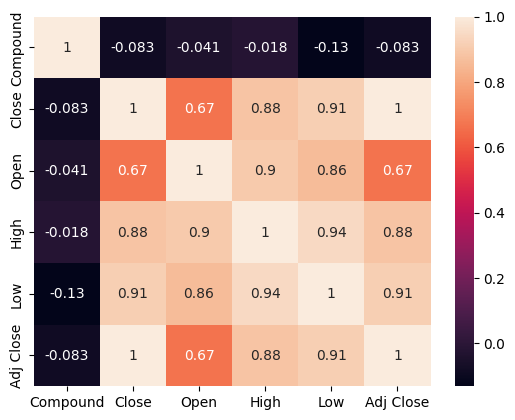

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()